In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def cusum(temp, bias):
    length = len(temp)
    if length < 10:
        return []
    history = [*temp[:10]]
    cusums = [0] * length
    for i in range(10, length):
        temp_hat = np.mean(history)
        s_i = max(0, abs(temp[i] - temp_hat) - bias)
        cusums[i] = max(0, cusums[i-1] + s_i)
        history.pop(0)
        history.append(temp[i])
    return cusums

def attack_detection(temp, alerts, threshold):
    length = len(temp)
    cusums = cusum(temp, 0.5)
    anomalies = [0] * length 
    changes = [0] * length
    for i in range(10, len(temp)):
        if cusums[i] > threshold:
            changes[i] = 1
            if not alerts[i]:
                anomalies[i] = 1
        elif alerts[i]:
            anomalies[i] = 1
    return changes, anomalies

In [3]:
def plot(temp, thres, alerts, changes, anomalies):
    plt.plot(temp, label='Temperature')
    plt.plot(thres, label='Threshold')
    plt.scatter(np.where(alerts)[0], [temp[i] for i in range(len(alerts)) if alerts[i]], color='red', label='Alert')
    plt.scatter(np.where(changes)[0], [temp[i] for i in range(len(changes)) if changes[i]], color='green', label='Change')
    plt.scatter(np.where(anomalies)[0], [temp[i] for i in range(len(anomalies)) if anomalies[i]], color='purple', label='Anomaly')
    plt.legend()
    plt.show()

In [4]:
samples = 200
room_temperature = 25
threshold = 80

def sigmoid(x):
    return 80 / (1 + np.exp(120-x))

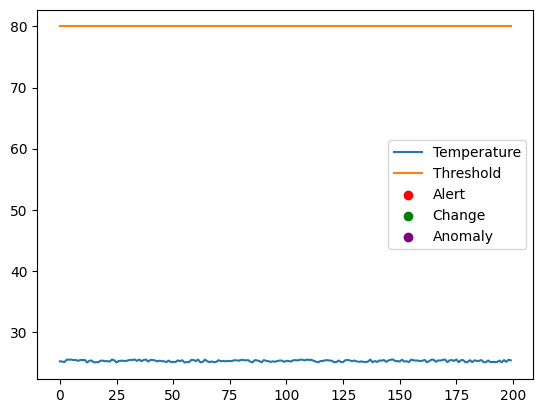

In [47]:
# senario 1 - normal
noise = np.random.uniform(0, 0.5, samples)
temperature = np.ones(samples) * room_temperature + noise
thresholds = np.ones(samples) * threshold
alerts = np.zeros(samples)
dramatical_changes, anomalies_detected = attack_detection(temperature, alerts, 80)
plot(temperature, thresholds, alerts, dramatical_changes, anomalies_detected)

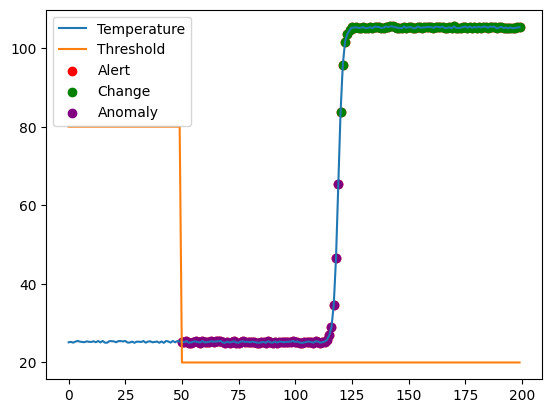

In [48]:
# senario 2 - fire
# There was a fire, changed the threshold to detect the attack and then found the fire.
def sigmoid(x):
    return 80 / (1 + np.exp(120-x))

noise = np.random.uniform(0, 0.5, samples)
fire = sigmoid(np.linspace(1, samples, samples))
temperature = np.ones(samples) * room_temperature + noise + fire

thresholds = np.concat([np.ones(50) * threshold, np.ones(150) * 20])
alerts = temperature > thresholds
dramatical_changes, anomalies_detected = attack_detection(temperature, alerts, 80)
plot(temperature, thresholds, alerts, dramatical_changes, anomalies_detected)

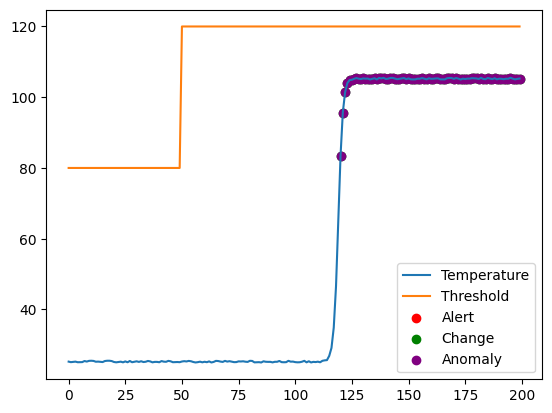

In [49]:
# senario 3 - fire
# There was a fire, the threshold was raised and the fire was detected and attacked.
noise = np.random.uniform(0, 0.5, samples)
fire = sigmoid(np.linspace(1, samples, samples))
temperature = np.ones(samples) * room_temperature + noise + fire

thresholds = np.concat([np.ones(50) * 80, np.ones(150) * 120])
alerts = temperature > thresholds
dramatical_changes, anomalies_detected = attack_detection(temperature, alerts, 80)
plot(temperature, thresholds, alerts, dramatical_changes, anomalies_detected)